## 新能源电动汽车动力电池充电能量预测（五）——模型训练

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import date, datetime
from package import utils
import time

### 导入数据

In [2]:
# 导入经过填充之后的数据集合
dataset = pd.read_csv('./energy_predict_data/train_data_prehandle/4_fill_null/whole/filled_by_kmeans/predict_data_e_train.csv')
# 数据字段
header = dataset.columns.values.tolist()
# 数据集大小
count = np.max(dataset['vehicle_id'])
# 数据描述
pd.set_option('precision', 2)
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,5990.00,5.99e+03,5.99e+03,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5980.00,5990.00,5980.00,5990.00,5990.00,5990.00,5990.00
mean,11.37,2.02e+13,2.02e+13,7178.32,103588.11,102.27,35.57,76.56,40.99,405.94,436.13,-43.74,-22.32,27.19,15.18,12.04,25.94
std,6.45,4.00e+09,4.00e+09,8366.48,30819.13,64.72,19.37,26.82,22.35,91.53,87.88,48.22,35.36,10.62,11.55,9.95,21.24
min,1.00,2.02e+13,2.02e+13,600.00,45631.70,0.00,0.00,4.80,0.00,252.30,0.00,-202.00,-400.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2168.25,78704.15,63.10,20.80,55.25,22.40,340.40,374.60,-59.80,-20.40,18.00,5.00,6.00,12.64
50%,11.00,2.02e+13,2.02e+13,3861.00,97276.05,93.25,34.00,87.00,40.00,361.50,391.60,-24.00,-9.30,30.00,14.00,9.00,19.61
75%,17.00,2.02e+13,2.02e+13,6429.00,122780.75,132.78,47.00,100.00,61.00,533.70,551.70,-9.00,-5.00,35.00,25.00,12.00,29.56
max,21.00,2.02e+13,2.02e+13,59960.00,182536.00,490.00,96.00,110.49,99.00,574.60,604.70,-0.10,8.00,52.00,46.00,51.00,103.72


In [3]:
dataset.isnull().sum()

vehicle_id            0
charge_start_time     0
charge_end_time       0
charge_duration       0
mileage               0
delta_mileage         0
charge_start_soc      0
charge_end_soc        0
charge_delta_soc      0
charge_start_U        0
charge_end_U         10
charge_start_I        0
charge_end_I         10
charge_max_temp       0
charge_min_temp       0
charge_delta_temp     0
charge_energy         0
dtype: int64

### 特征选取

In [4]:
features = ['charge_duration', 
            'delta_mileage',
            'charge_start_soc', 
            'charge_delta_soc', 
            'charge_end_soc',
            'charge_start_U',
            'charge_start_I',
            'charge_delta_temp']
label = header[16]
features, label

(['charge_duration',
  'delta_mileage',
  'charge_start_soc',
  'charge_delta_soc',
  'charge_end_soc',
  'charge_start_U',
  'charge_start_I',
  'charge_delta_temp'],
 'charge_energy')

### 构造特征集合和输出集合

In [5]:
X = dataset[features]
y = dataset[label]

### 创建训练后的预测值数据集

In [6]:
type = 3
data_proced = pd.DataFrame()
data_proced['id'] = dataset.index
data_proced['type'] = 3 # 使用填充值,并且进行标准化

### 划分训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)##训练集划分

### 标准化

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))
X = scaler.fit_transform(X.astype(np.float64))

### 特征选择

In [9]:
#导入sklearn库中的VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel = VarianceThreshold(threshold=0.08)
#选择方差大于0.08的特征
X_sel = sel.fit_transform(X_train.astype(np.float64))

### 训练模型

#### 线性回归模型（lr）

Running time: 0.07151200000000024 Seconds
MSE: 54.4312272789
RMSE: 7.37775218335
MAE: 5.31046833228
ER: 0.536517718509
RANK: 84.258287004
R2: 0.879412967273


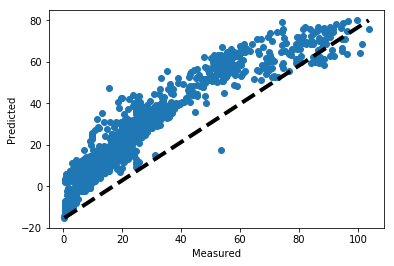

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# 训练
#记录训练开始时间
time_start=time.clock()
linreg.fit(X_train, y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
# y_pred = linreg.predict(X) 
y_pred = linreg.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [11]:
# pred = linreg.predict(X)
# data_proced['lr'] = y_pred

#### 多项式回归模型（plr）

Running time: 0.06895700000000016 Seconds
MSE: 9.73427766376e+15
RMSE: 98662443.0255
MAE: 90459465.6373
ER: 11534841.0441
RANK: 1338326909.24
R2: -2.15653351558e+13


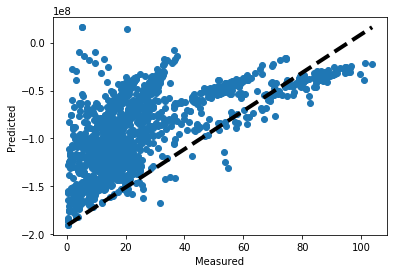

In [12]:
from sklearn.preprocessing import PolynomialFeatures
featurizer = PolynomialFeatures(degree=3)
X_train_cubic = featurizer.fit_transform(X_train)
linreg = LinearRegression()
# 训练
#记录训练开始时间
time_start=time.clock()
linreg.fit(X_train_cubic, y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
X_test_cubic = featurizer.transform(X_test)
y_pred = linreg.predict(X_test_cubic)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [13]:
# y_pred = linreg.predict(featurizer.fit_transform(X))
# data_proced['plr'] = y_pred

#### SVR_linear

Running time: 0.6239150000000002 Seconds
MSE: 65.0967736923
RMSE: 8.06825716573
MAE: 4.90963141709
ER: 0.35918870637
RANK: 42.4192702316
R2: 0.855784497759


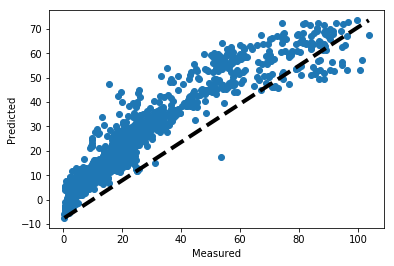

In [14]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='linear')
# 训练
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
y_pred = l_svr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [15]:
# y_pred = l_svr.predict(X)
# data_proced['svr_lr'] = y_pred

####  SVR_poly

Running time: 0.5925650000000005 Seconds
MSE: 167.004648895
RMSE: 12.9230278532
MAE: 7.94880416335
ER: 0.717586209449
RANK: 87.3526597249
R2: 0.63001761914


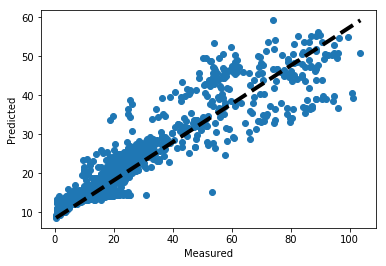

In [16]:
l_svr=SVR(kernel='poly')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [17]:
# y_pred = n_svr.predict(X)
# data_proced['svr_plr'] = y_pred

#### SVR_rbf

Running time: 0.6953440000000004 Seconds
MSE: 66.9366674267
RMSE: 8.18148320457
MAE: 4.77145103997
ER: 0.283537575589
RANK: 28.1253000096
R2: 0.851708394076


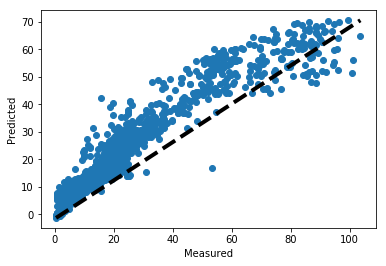

In [18]:
l_svr=SVR(kernel='rbf')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [19]:
# y_pred=l_svr.predict(X)
# data_proced['svr_rbf'] = y_pred

###  决策树回归（dtr）

Running time: 0.02942900000000037 Seconds
MSE: 13.2156736443
RMSE: 3.63533679929
MAE: 1.90131843064
ER: 0.107219813125
RANK: 8.65728055592
R2: 0.970721974317


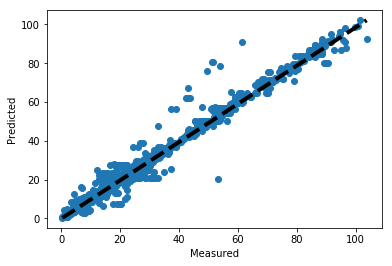

In [20]:
import time
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
dt.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = dt.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [21]:
# y_pred = dt.predict(X)
# data_proced['dtr'] = y_pred

### 极端森林（etr）

Running time: 0.093642 Seconds
MSE: 7.3735338279
RMSE: 2.71542516522
MAE: 1.54262997767
ER: 0.0872676220813
RANK: 6.04264487945
R2: 0.98366466072


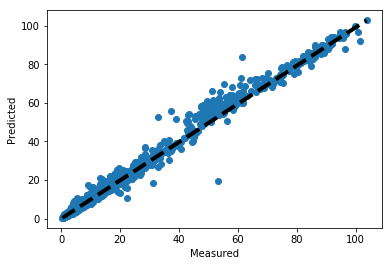

In [22]:
import time
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
etr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = etr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [23]:
# y_pred = etr.predict(X)
# data_proced['etr'] = y_pred

### 随机森林（rtr）

Running time: 0.1781959999999998 Seconds
MSE: 7.41720624383
RMSE: 2.72345483602
MAE: 1.51430288815
ER: 0.0910659031984
RANK: 6.9266985777
R2: 0.983567908776


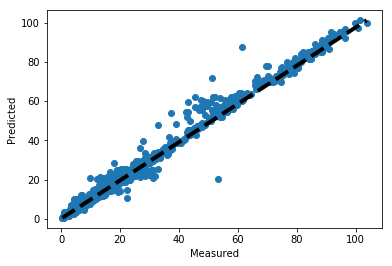

In [24]:
import time
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
rfr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = rfr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [25]:
# y_pred = rfr.predict(X)
# data_proced['rtr'] = y_pred

### 自适应增强决策树模型（abr）

Running time: 0.2705390000000003 Seconds
MSE: 26.3809051004
RMSE: 5.13623452545
MAE: 4.06140205715
ER: 0.528167625796
RANK: 71.9936553212
R2: 0.941555698342


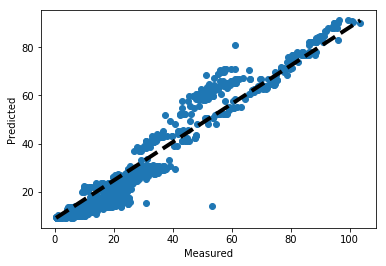

In [26]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
abr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = abr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [27]:
# y_pred = abr.predict(X)
# data_proced['abr'] = y_pred

### BaggingRegressor（br）

Running time: 0.17391699999999943 Seconds
MSE: 8.53586114872
RMSE: 2.92161961055
MAE: 1.51060246276
ER: 0.0870804806981
RANK: 6.4899087249
R2: 0.981089638813


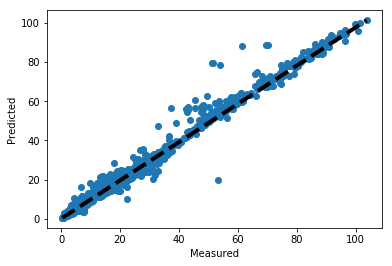

In [28]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
br.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = br.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [29]:
# y_pred = br.predict(X)
# data_proced['br'] = y_pred

### GradientBoostingRegressor（gbr）

Running time: 0.2068019999999997 Seconds
MSE: 13.2855293422
RMSE: 3.6449320079
MAE: 2.01102249347
ER: 0.118852139827
RANK: 9.0147729859
R2: 0.970567215886


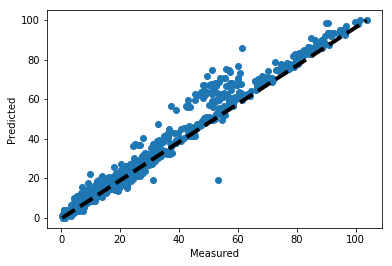

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
gbr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = gbr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [31]:
# y_pred = gbr.predict(X)
# data_proced['gbr'] = y_pred

###  XGBRegressor

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Running time: 0.13659799999999933 Seconds
MSE: 13.1978566422
RMSE: 3.63288544304
MAE: 1.98504876764
ER: 0.117521802002
RANK: 9.1443556946
R2: 0.970761446133


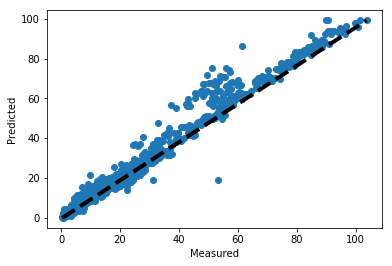

In [32]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
xgbr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = xgbr.predict(X_test)

#评估模型
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [33]:
# y_pred = xgbr.predict(X)
# data_proced['xgbr'] = y_pred

### MLPRegressor

Running time: 2.515796 Seconds
MSE: 10.3996686922
RMSE: 3.22485173182
MAE: 2.26753532698
ER: 0.176979365703
RANK: 22.0233851903
R2: 0.976960556437


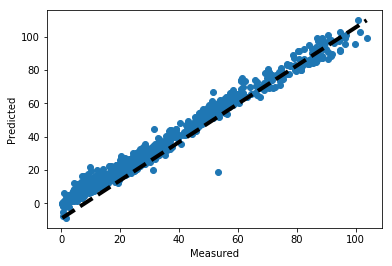

In [34]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(solver='lbfgs')
# 训练
#记录训练开始时间
time_start = time.clock()
mlpr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = mlpr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [35]:
# y_pred = mlpr.predict(X)
# data_proced['mlpr'] = y_pred

### BP神经网络

Using TensorFlow backend.
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_dim=8, kernel_initializer="uniform")`
  """
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
4492/4492 [==============================] - 0s 80us/step - loss: 135.4131
Epoch 2/1000
4492/4492 [==============================] - 0s 52us/step - loss: 55.5457
Epoch 3/1000
4492/4492 [==============================] - 0s 57us/step - loss: 41.3570
Epoch 4/1000
4492/4492 [==============================] - 0s 63us/step - loss: 39.9720
Epoch 5/1000
4492/4492 [==============================] - 0s 62us/step - loss: 37.3299
Epoch 6/1000
4492/4492 [==============================] - 0s 61us/step - loss: 35.1436
Epoch 7/1000
4492/4492 [==============================] - 1s 112us/step - loss: 29.1857
Epoch 8/1000
4492/4492 [==============================] - 1s 131us/step - loss: 30.5710
Epoch 9/1000
4492/4492 [==============================] - 1s 112us/step - loss: 27.9964
Epoch 10/1000
4492/4492 [==============================] - 0s 54us/step - loss: 31.4809
Epoch 11/1000
4492/4492 [==============================] - 0s 93us/step - loss: 26.4269
Epoch 12/1000
4492/4492 [============

4492/4492 [==============================] - 0s 50us/step - loss: 14.1953
Epoch 95/1000
4492/4492 [==============================] - 0s 63us/step - loss: 15.4442
Epoch 96/1000
4492/4492 [==============================] - 0s 56us/step - loss: 14.1834
Epoch 97/1000
4492/4492 [==============================] - 0s 56us/step - loss: 12.7662
Epoch 98/1000
4492/4492 [==============================] - 0s 49us/step - loss: 12.2602
Epoch 99/1000
4492/4492 [==============================] - 0s 51us/step - loss: 13.4695
Epoch 100/1000
4492/4492 [==============================] - 0s 50us/step - loss: 15.1717
Epoch 101/1000
4492/4492 [==============================] - 0s 55us/step - loss: 14.7813
Epoch 102/1000
4492/4492 [==============================] - 0s 50us/step - loss: 13.2935
Epoch 103/1000
4492/4492 [==============================] - 0s 50us/step - loss: 13.7542
Epoch 104/1000
4492/4492 [==============================] - 0s 50us/step - loss: 13.7558
Epoch 105/1000
4492/4492 [===============

4492/4492 [==============================] - 0s 56us/step - loss: 16.0508
Epoch 187/1000
4492/4492 [==============================] - 0s 50us/step - loss: 11.4200
Epoch 188/1000
4492/4492 [==============================] - 0s 57us/step - loss: 11.5678
Epoch 189/1000
4492/4492 [==============================] - 0s 47us/step - loss: 10.0710
Epoch 190/1000
4492/4492 [==============================] - 0s 50us/step - loss: 11.7575
Epoch 191/1000
4492/4492 [==============================] - 0s 50us/step - loss: 14.4672
Epoch 192/1000
4492/4492 [==============================] - 0s 50us/step - loss: 14.0367
Epoch 193/1000
4492/4492 [==============================] - 0s 50us/step - loss: 12.7154
Epoch 194/1000
4492/4492 [==============================] - 0s 52us/step - loss: 10.5490
Epoch 195/1000
4492/4492 [==============================] - 0s 53us/step - loss: 14.8533
Epoch 196/1000
4492/4492 [==============================] - 0s 51us/step - loss: 14.1621
Epoch 197/1000
4492/4492 [==========

4492/4492 [==============================] - 0s 50us/step - loss: 8.8281
Epoch 279/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.4686
Epoch 280/1000
4492/4492 [==============================] - 0s 53us/step - loss: 8.6163
Epoch 281/1000
4492/4492 [==============================] - 0s 51us/step - loss: 8.7627
Epoch 282/1000
4492/4492 [==============================] - 0s 50us/step - loss: 9.1305
Epoch 283/1000
4492/4492 [==============================] - 0s 50us/step - loss: 10.5904
Epoch 284/1000
4492/4492 [==============================] - 0s 52us/step - loss: 9.2395
Epoch 285/1000
4492/4492 [==============================] - 0s 49us/step - loss: 9.1155
Epoch 286/1000
4492/4492 [==============================] - 0s 49us/step - loss: 8.9274
Epoch 287/1000
4492/4492 [==============================] - 0s 49us/step - loss: 9.5671
Epoch 288/1000
4492/4492 [==============================] - 0s 54us/step - loss: 8.6499
Epoch 289/1000
4492/4492 [====================

4492/4492 [==============================] - 0s 52us/step - loss: 9.4042
Epoch 372/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.8340
Epoch 373/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.9256
Epoch 374/1000
4492/4492 [==============================] - 0s 58us/step - loss: 8.1731
Epoch 375/1000
4492/4492 [==============================] - 0s 50us/step - loss: 9.3463
Epoch 376/1000
4492/4492 [==============================] - 0s 56us/step - loss: 8.0311
Epoch 377/1000
4492/4492 [==============================] - 0s 51us/step - loss: 8.9126
Epoch 378/1000
4492/4492 [==============================] - 0s 58us/step - loss: 8.0497
Epoch 379/1000
4492/4492 [==============================] - 0s 58us/step - loss: 7.9702
Epoch 380/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.9924
Epoch 381/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.5038
Epoch 382/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 55us/step - loss: 8.3832
Epoch 465/1000
4492/4492 [==============================] - 0s 65us/step - loss: 7.9117
Epoch 466/1000
4492/4492 [==============================] - 0s 54us/step - loss: 7.8265
Epoch 467/1000
4492/4492 [==============================] - 0s 59us/step - loss: 7.7739
Epoch 468/1000
4492/4492 [==============================] - 0s 59us/step - loss: 8.2905
Epoch 469/1000
4492/4492 [==============================] - 0s 58us/step - loss: 8.2743
Epoch 470/1000
4492/4492 [==============================] - 0s 54us/step - loss: 8.0791
Epoch 471/1000
4492/4492 [==============================] - 0s 55us/step - loss: 8.8114
Epoch 472/1000
4492/4492 [==============================] - 0s 57us/step - loss: 8.8236
Epoch 473/1000
4492/4492 [==============================] - 0s 52us/step - loss: 7.8817
Epoch 474/1000
4492/4492 [==============================] - 0s 55us/step - loss: 7.8426
Epoch 475/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 49us/step - loss: 7.8798
Epoch 558/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.7202
Epoch 559/1000
4492/4492 [==============================] - 0s 51us/step - loss: 8.0172
Epoch 560/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.8919
Epoch 561/1000
4492/4492 [==============================] - 0s 53us/step - loss: 8.4560
Epoch 562/1000
4492/4492 [==============================] - 0s 48us/step - loss: 9.1736
Epoch 563/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.3992
Epoch 564/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.0853
Epoch 565/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.9465
Epoch 566/1000
4492/4492 [==============================] - 0s 53us/step - loss: 8.2899
Epoch 567/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.8441
Epoch 568/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 51us/step - loss: 7.3647
Epoch 651/1000
4492/4492 [==============================] - 0s 46us/step - loss: 8.4111
Epoch 652/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.9783
Epoch 653/1000
4492/4492 [==============================] - 0s 53us/step - loss: 7.6650
Epoch 654/1000
4492/4492 [==============================] - 0s 45us/step - loss: 7.7280
Epoch 655/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.9176
Epoch 656/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.9870
Epoch 657/1000
4492/4492 [==============================] - 0s 46us/step - loss: 8.1017
Epoch 658/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.4218
Epoch 659/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.6469
Epoch 660/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.4197
Epoch 661/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 49us/step - loss: 7.4216
Epoch 744/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.6233
Epoch 745/1000
4492/4492 [==============================] - 0s 54us/step - loss: 7.8478
Epoch 746/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.8915
Epoch 747/1000
4492/4492 [==============================] - 0s 53us/step - loss: 8.4375
Epoch 748/1000
4492/4492 [==============================] - 0s 52us/step - loss: 7.5412
Epoch 749/1000
4492/4492 [==============================] - 0s 56us/step - loss: 7.4773
Epoch 750/1000
4492/4492 [==============================] - 0s 61us/step - loss: 7.5079
Epoch 751/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.7768
Epoch 752/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.4239
Epoch 753/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.1441
Epoch 754/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 61us/step - loss: 7.5977
Epoch 837/1000
4492/4492 [==============================] - 0s 53us/step - loss: 7.6068
Epoch 838/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.2873
Epoch 839/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.7230
Epoch 840/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.5494
Epoch 841/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.6278
Epoch 842/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.7278
Epoch 843/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.7227
Epoch 844/1000
4492/4492 [==============================] - 0s 53us/step - loss: 7.8711
Epoch 845/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.8203
Epoch 846/1000
4492/4492 [==============================] - 0s 72us/step - loss: 7.4730
Epoch 847/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 51us/step - loss: 7.7455
Epoch 930/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.6780
Epoch 931/1000
4492/4492 [==============================] - 0s 51us/step - loss: 7.5652
Epoch 932/1000
4492/4492 [==============================] - 0s 56us/step - loss: 7.8827
Epoch 933/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.4408
Epoch 934/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.4667
Epoch 935/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.3772
Epoch 936/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.1188
Epoch 937/1000
4492/4492 [==============================] - 0s 49us/step - loss: 8.2259
Epoch 938/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.7366
Epoch 939/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.3099
Epoch 940/1000
4492/4492 [=====================

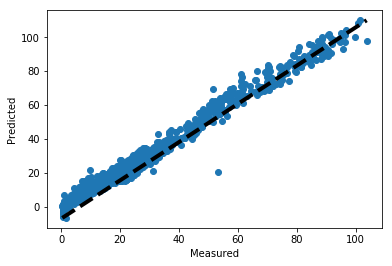

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import regularizers
model = Sequential()  #层次模型
model.add(Dense(24,input_dim=len(features),init='uniform'))
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1,input_dim=24))  #输出层
model.compile(loss='mean_squared_error', optimizer='sgd') #编译模型
# 训练
#记录训练开始时间
time_start = time.clock()
model.fit(X_train, y_train, nb_epoch = 1000, batch_size = 20) #训练模型1000次
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
res = model.predict(X_test)
y_pred = []
for i in range(len(res)):
    y_pred.append(res[i][0])
#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [37]:
# y_pred = model.predict(X)
# data_proced['bpr'] = y_pred

In [38]:
data_proced.to_csv('./energy_predict_data/predict_result/data_pre_%d.csv' % type, index = False)